In [33]:
import numpy as np
import pandas as pd

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("C:\\Users\\arinj\\Downloads\\apple_stock_prices\\apple_stock.csv")
print(df.shape)
print(df.columns)
print(df[0:1])

(2475, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date       Open       High     Low      Close  Adj Close     Volume
0  2014-01-02  19.845715  19.893929  19.715  19.754642  17.318729  234684800


In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [37]:
df = df.drop('Adj Close', axis=1) 
df['Date'] = pd.to_datetime(df['Date']) 
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day'] = df['Date'].dt.day 
df = df.drop('Date', axis=1) 

In [38]:
# X = features, y = target variable
X = df.drop('Close', axis=1)
y = df['Close']
X

,Open,High,Low,Volume,year,month,day
0,19.845715,19.893929,19.715000,234684800,2014,1,2
1,19.745001,19.775000,19.301071,392467600,2014,1,3
2,19.194643,19.528570,19.057142,412610800,2014,1,6
3,19.440001,19.498571,19.211430,317209200,2014,1,7
4,19.243214,19.484285,19.238930,258529600,2014,1,8
...,...,...,...,...,...,...,...
2470,171.880005,173.059998,170.649994,57157000,2023,10,25
2471,170.369995,171.380005,165.669998,70625300,2023,10,26
2472,166.910004,168.960007,166.830002,58499100,2023,10,27
2473,169.020004,171.169998,168.869995,51131000,2023,10,30


In [39]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# regression model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.4450491526790808
R-squared: 0.9998519761875518


In [42]:
len(y_test)
len(y_pred)
y_pred

array([ 36.30465787, 174.06658485,  39.21321067,  81.04380896,
       118.04235324,  42.85746118,  79.05369989,  19.36395543,
       157.02170929,  40.34484795, 193.64972791, 123.2806109 ,
        31.67282736,  66.04775153,  44.90234536, 150.3675781 ,
        26.68928243, 167.12101723,  74.71318562, 176.15615626,
        27.61957728,  62.06093921,  24.06414474,  27.50738783,
       151.51867326,  18.98347592,  47.13894504, 179.4994825 ,
        43.50838222,  43.65055398,  42.62738503,  41.51659226,
       190.54674206, 176.23996729,  29.70096932, 129.27767597,
        26.16105647, 123.19089931,  54.74927103,  72.67893497,
        43.15168454, 160.12359441, 148.28820918,  52.10185543,
        74.05438422, 123.21108749, 160.87349564,  46.71113061,
        29.83081269,  53.47937484,  37.92980159,  97.85083767,
        56.22968854, 134.59254441, 141.94081546,  86.83814324,
        38.8147468 ,  74.88892   , 170.64483443,  28.15979884,
        25.14290392,  28.88979839,  42.27968561,  38.02

In [43]:
# load dataset again for eda
df = pd.read_csv("C:\\Users\\arinj\\Downloads\\apple_stock_prices\\apple_stock.csv")
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [44]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [46]:
# check for missinf values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...,...
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100


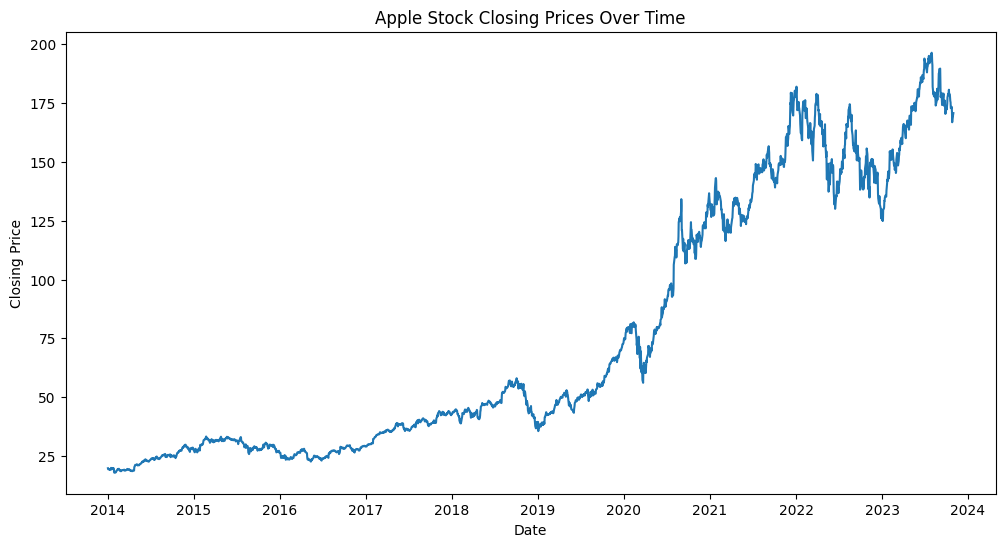

In [48]:
# line plot of closing prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show() # shows date in 

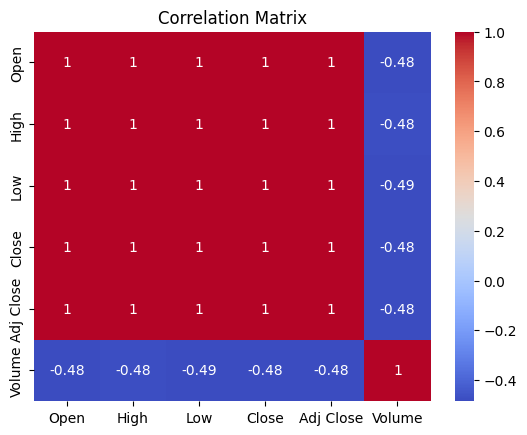

In [49]:
# correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

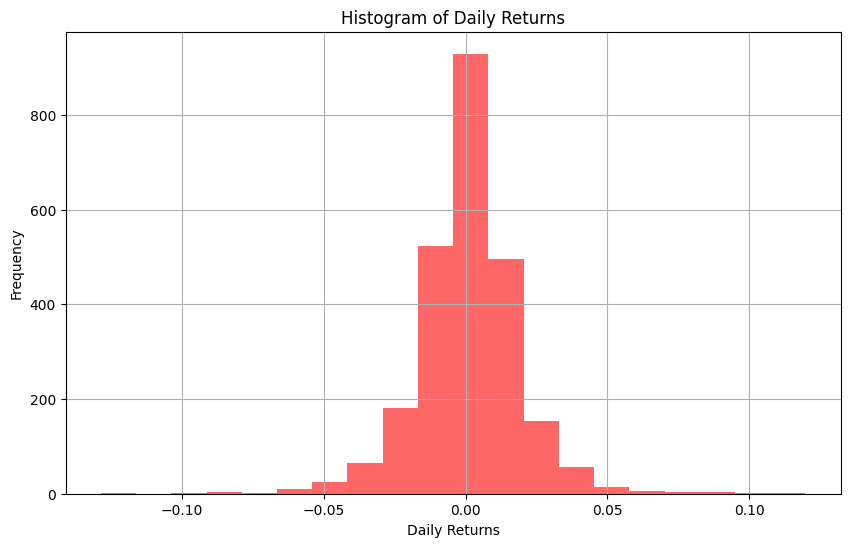

In [50]:
# daily returns
df['Daily Return'] = df['Close'].pct_change()

# plot histograms of daily returns
plt.figure(figsize=(10,6))
df['Daily Return'].dropna().hist(bins=20, color='red', alpha=0.6)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

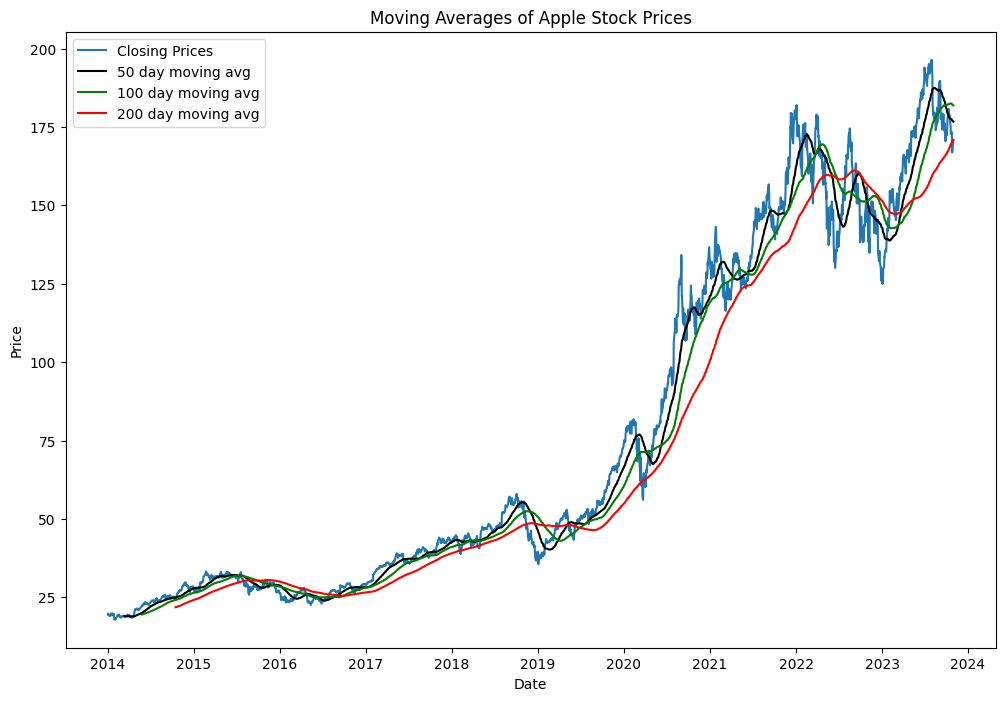

In [51]:
# Moving averages
df['movingAvg_50'] = df['Close'].rolling(window=50).mean()
df['movingAvg_100'] = df['Close'].rolling(window=100).mean()
df['movingAvg_200'] = df['Close'].rolling(window=200).mean()

# plot closing prices and moving averages
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Closing Prices')
plt.plot(df['movingAvg_50'], label='50 day moving avg', color='black')
plt.plot(df['movingAvg_100'], label='100 day moving avg', color='green')
plt.plot(df['movingAvg_200'], label='200 day moving avg', color='red')
plt.title('Moving Averages of Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [52]:
from statsmodels.tsa.arima.model import ARIMA

p_values = range(4)
d_values = range(2)
q_values = range(3)

best_aic = float('inf')
best_order = None
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(df['Close'], order=(p,d,q))
                results = model.fit()
                aic = results.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p,d,q)
                    best_model = results
                
            except:
                pass

c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provide

In [53]:
print('Best ARIMA order:', best_order)
print('Best AIC:', best_aic)

Best ARIMA order: (3, 0, 2)
Best AIC: 9722.054231664744


In [82]:
model = ARIMA(df['Close'], order=(4, 1, 2))  # Replace with appropriate order
results = model.fit()
print(results.summary())

c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting au

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2475
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -4862.760
Date:                Thu, 11 Jan 2024   AIC                           9739.520
Time:                        23:32:38   BIC                           9780.216
Sample:                             0   HQIC                          9754.302
                               - 2475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3357      0.015     22.635      0.000       0.307       0.365
ar.L2         -0.9907      0.015    -67.039      0.000      -1.020      -0.962
ar.L3         -0.0374      0.012     -3.021      0.0

c:\Users\arinj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


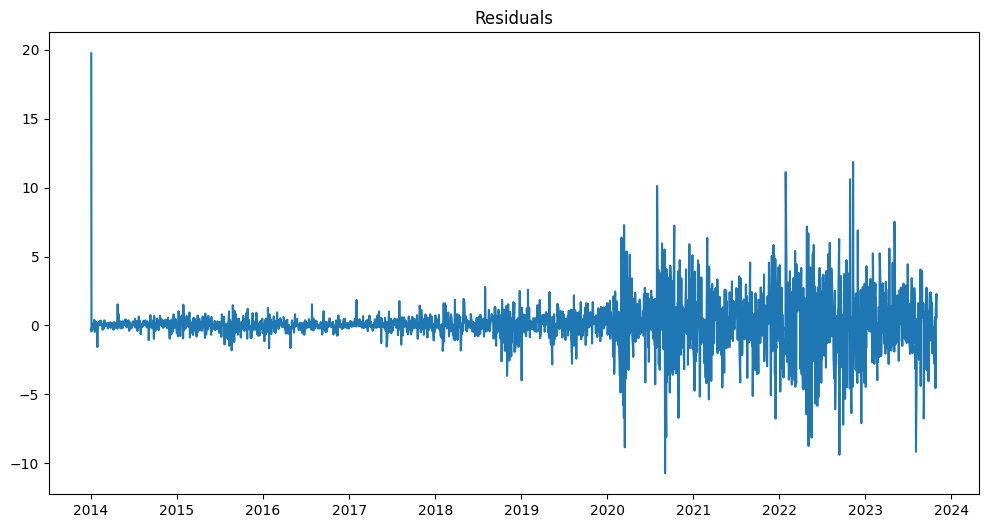

In [85]:
# Extract residuals
residuals = results.resid

# Plot residuals for analysis
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [77]:
print(df['Close'].min(), df['Close'].max())
print(predictions.min(), predictions.max())


17.849285125732422 196.4499969482422
170.62753187259037 171.01464912869287
